In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('titanic.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
df['Age'].fillna(df.Age.median(), inplace=True)

# standardization


In [7]:
from sklearn.preprocessing import StandardScaler

# difference between fit and fit_tranform 
In the context of scikit-learn, a popular machine learning library in Python, fit and fit_transform methods play crucial roles in the data preprocessing step. Let's clarify the differences:

1. fit:
When you fit an algorithm (like a scaler or a machine learning model), you're essentially computing the necessary parameters needed to apply a transformation or to make a prediction, but you're not actually transforming or predicting anything yet.

For example, for a scaler, fit computes parameters like mean and standard deviation for standardization but doesn't scale your data yet.

2. fit_transform:
This method essentially combines the fit and transform methods into a single step. First, it computes the necessary parameters (i.e., it "fits" the model), and then it directly applies the transformation on the dataset.

Using fit_transform can sometimes be more optimized and faster than using fit and transform separately, especially when dealing with large datasets.

In [8]:
# Example code:
# Sample data
data = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Using fit followed by transform
scaler = StandardScaler()
scaler.fit(data)
scaled_data_1 = scaler.transform(data)

# Using fit_transform
scaler = StandardScaler()
scaled_data_2 = scaler.fit_transform(data)

print(scaled_data_1)
print(scaled_data_2)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

transformation will be done feature/column wise

In [10]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [11]:
df.Survived.std()

0.4865924542648575

In [12]:
df.Survived.mean()

0.3838383838383838

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

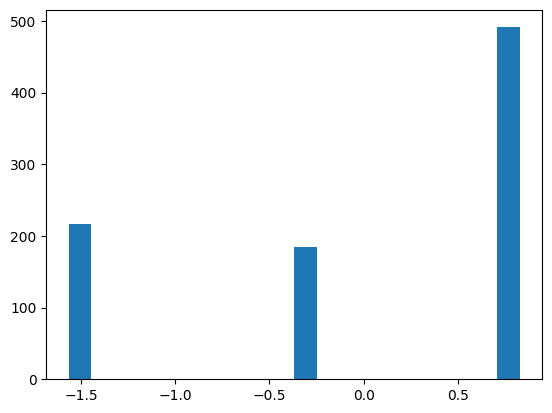

In [14]:
# plot for pclass
plt.hist(df_scaled[:,1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

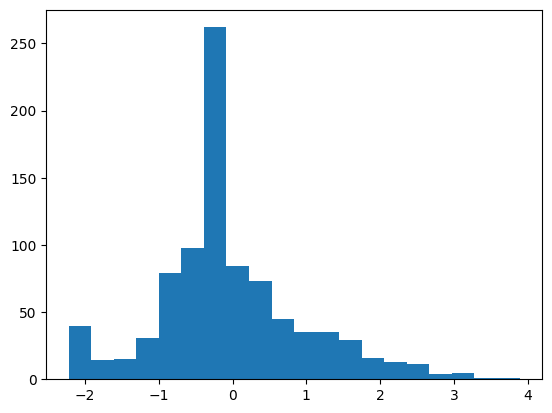

In [15]:
#age
plt.hist(df_scaled[:,2], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

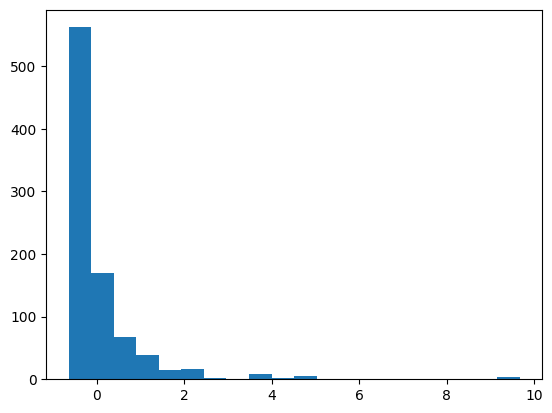

In [18]:
#fare
plt.hist(df_scaled[:,3], bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.68645923, -0.58364612, -0.48083301, -0.37801991,
        -0.2752068 , -0.17239369, -0.06958059,  0.03323252,  0.13604563,
         0.23885873,  0.34167184,  0.44448495,  0.54729805,  0.65011116,
         0.75292427,  0.85573737,  0.95855048,  1.06136359,  1.16417669,
         1.2669898 ]),
 <BarContainer object of 20 artists>)

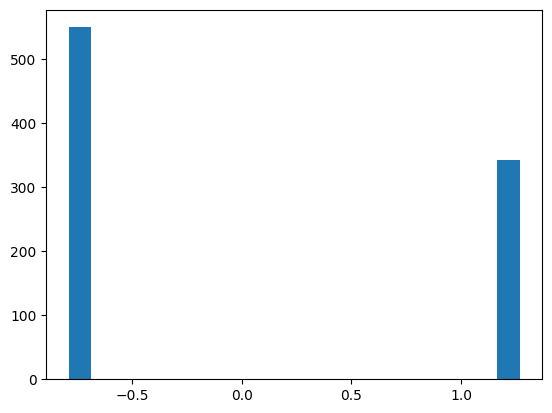

In [19]:
#survived
plt.hist(df_scaled[:,0], bins=20)